In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from OceanPSC.GanGeneration import Generation,print_classes
import time

In [2]:
print_classes()

0 abp
1 active_margin
2 cr
3 csh
4 land_csh
5 mor
6 passive_margin
7 rs
8 s_abp
9 s_rs
10 vrs


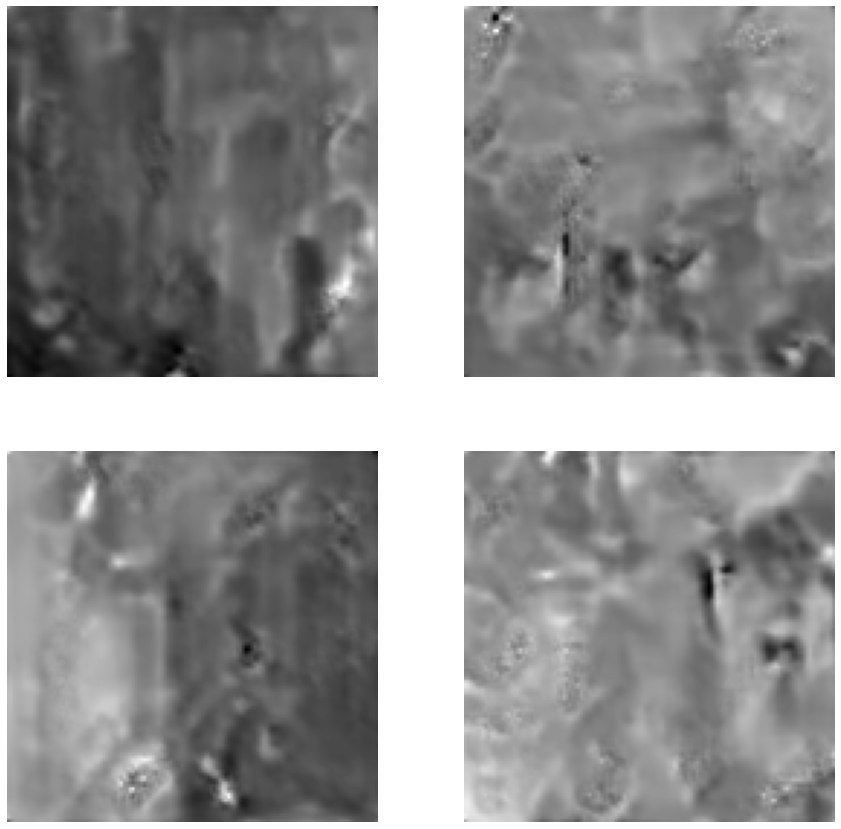

In [4]:
plt.figure(figsize=(15,15))
for i in range(4):
    map=gen.generate_one_sample(7)
    plt.subplot(2,2,i+1)
    plt.imshow(map,cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
import cv2
from scipy.ndimage.filters import gaussian_filter

In [63]:
classes=np.array([[7,7,7,7],
                  [7,9,7,7],
                  [10,7,7,0],
                  [7,0,0,8],
                 ])

inds=np.unique(classes)
classes2=np.zeros((classes.shape[0],classes.shape[1],len(inds)))
for ind,cpt in zip(inds,range(len(inds))):
    classes2[classes==ind,cpt]=1

classes2=cv2.resize(np.float32(classes2),(6,6),cv2.INTER_NEAREST_EXACT)
classes=np.zeros((classes2.shape[0],classes2.shape[1]))
for cpt in range(classes2.shape[-1]):
    classes[np.argmax(classes2,axis=-1)==cpt]=inds[cpt]
classes=np.int32(classes)
#classes=7*np.ones_like(classes)

In [89]:
gen=Generation(inter_d=2)

In [90]:

gen.num_candidates=100
t=time.time()
map=gen.generate_tiled_map(classes)
print(time.time()-t)

1.401719093322754


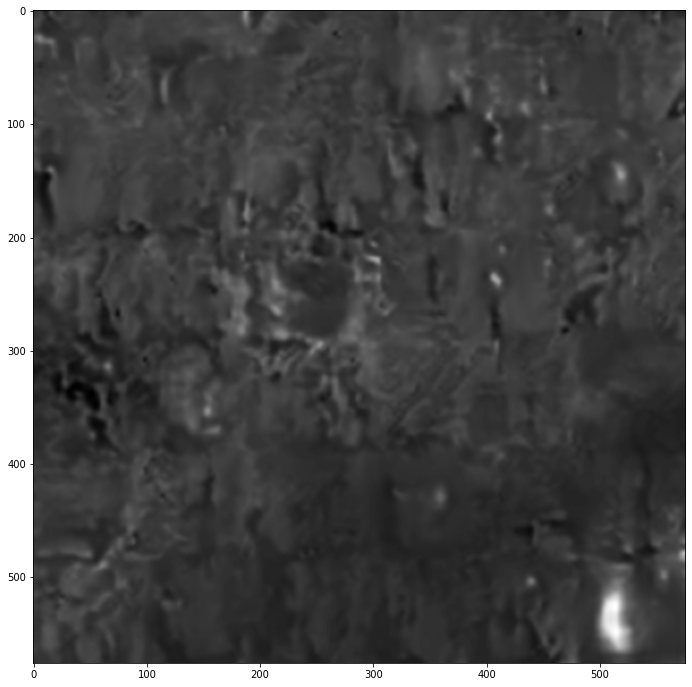

In [95]:

plt.figure(figsize=(12,12))
plt.imshow(gaussian_filter(map,1.5),cmap='gray')

In [41]:
import OceanPSC.Erosion as e

In [49]:
map2=e.erosion(map.copy(),iterations=20)

....................(576, 576) -885.8559444866441 -6153.268887566991 5267.412943080347


In [96]:

plt.imsave('dems/art.png',gaussian_filter(map,1.5),cmap='gray')

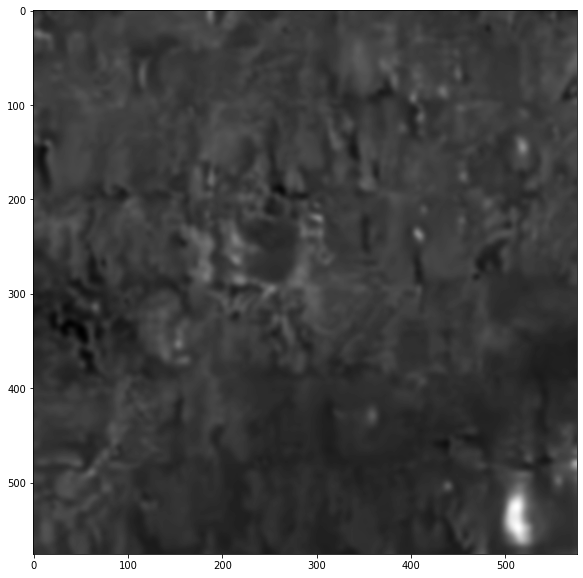

In [93]:

plt.figure(figsize=(10,10))
plt.imshow(gaussian_filter(map,2.5),cmap='gray')

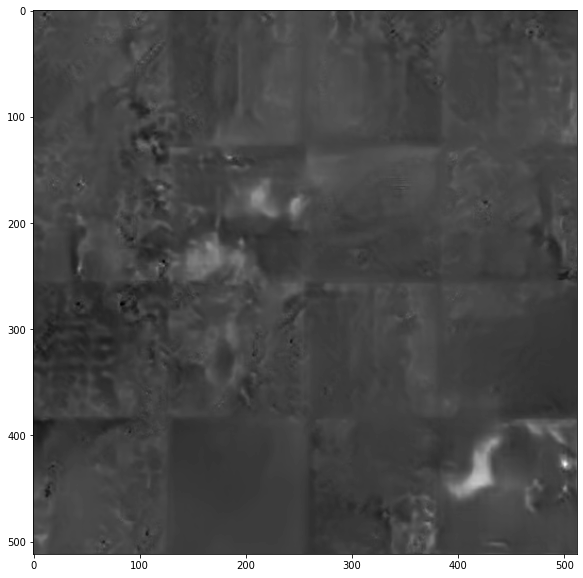

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(map,cmap='gray')

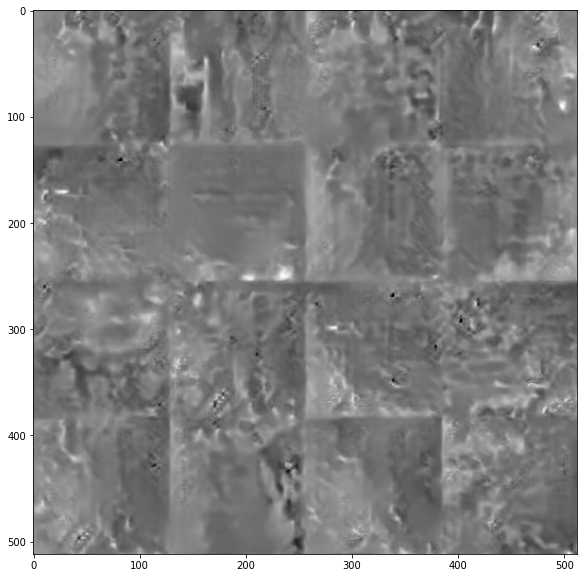

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(map,cmap='gray')